In [1]:
#import pandas
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.signal import welch
import pandas as pd
import seaborn
import numpy as np
from matplotlib.colors import LogNorm

Samples = 201

In [2]:
filename = "/home/natalia/Escritorio/ciencia-de-datos/tp-2/P01.mat"

In [3]:
p01 = sio.loadmat(filename)

In [4]:
matrix_p01 = p01['data']

In [5]:
matrix_p01.shape

(894, 256, 201)

In [7]:
electrodo_8_matrix = matrix_p01[:, 8, :]
electrodo_44_matrix = matrix_p01[:,44, :]
electrodo_80_matrix = matrix_p01[:, 80, :]
electrodo_131_matrix = matrix_p01[:, 131, :]
electrodo_185_matrix = matrix_p01[:, 185, :]

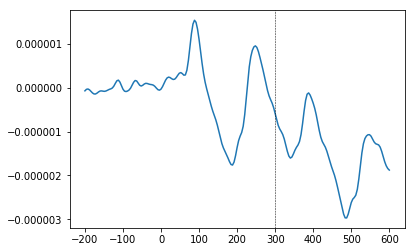

In [8]:
%matplotlib inline
#plt.xkcd()
import numpy as np
plt.plot(np.linspace(-200.0,600.0,Samples),electrodo_8_matrix.mean(axis=0))
plt.axvline(x=300, linestyle='--', color='black', linewidth=0.5)

## Ejercicio 1

In [9]:
electrodo_8_matrix = matrix_p01[:, 8, :]
electrodo_44_matrix = matrix_p01[:,44, :]
electrodo_80_matrix = matrix_p01[:, 80, :]
electrodo_131_matrix = matrix_p01[:, 131, :]
electrodo_185_matrix = matrix_p01[:, 185, :]

In [50]:
def plot_ej1(electrodo_i_matrix, linestyle="-", linewidth=1):
    '''Esta funcion gráfica el  promedio del voltaje de cada muestra por epoch en un electrodo'''
    xs = electrodo_i_matrix.shape[0]
    plt.bar(range(0,xs), electrodo_i_matrix.mean(axis=1), linestyle=linestyle)

## Graficos

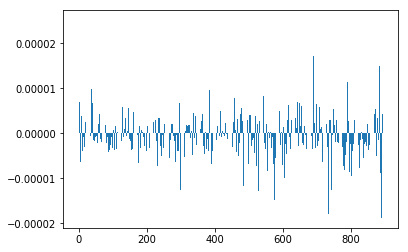

In [49]:
%matplotlib inline
import numpy as np

#electrodo_i_matrix = electrodo_8_matrix
plot_ej1(electrodo_8_matrix)

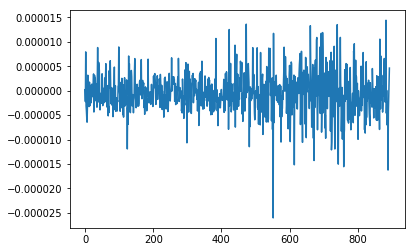

In [12]:
plot_ej1(electrodo_44_matrix)

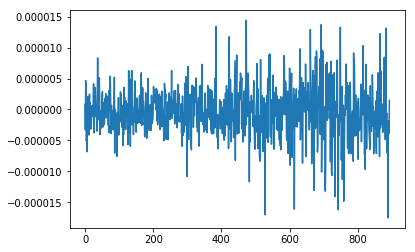

In [13]:
plot_ej1(electrodo_80_matrix)

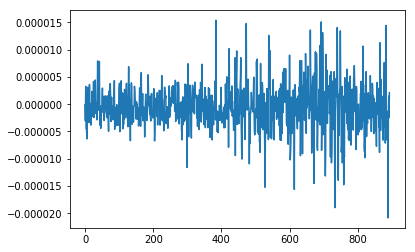

In [14]:
plot_ej1(electrodo_131_matrix)

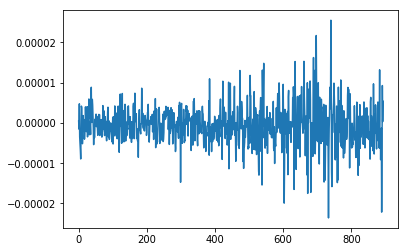

In [15]:
plot_ej1(electrodo_185_matrix)

In [16]:
def grafico_heatmap(frecuencies):
    frecuencies = np.array(frecuencies).T
    ax=seaborn.heatmap(frecuencies,norm=LogNorm(vmin=frecuencies.min(), vmax=frecuencies.max()))
    plt.show()

In [17]:
electrodes = [8, 44, 80, 131, 185]
cant_frec = 30

In [18]:
def all_elec_frecuencias(electrodes):
    all_frecuencies = np.zeros((len(electrodes), 894, 30))
    j = 0
    for electrodo_x in electrodes:
        frecuencies = []
        for i in range (0,894):
            elec_x_frec = matrix_p01[i, electrodo_x, :]
            a, b = welch(elec_x_frec, float(Samples/0.8))
            frecuencies.append(b[0:cant_frec])
        #print frecuencies
        frecuencies = np.array(frecuencies)#.T
        all_frecuencies[j] = frecuencies
        j += 1
    return all_frecuencies

In [19]:
matrix_all_frec = all_elec_frecuencias(electrodes)
mean_all_frec = matrix_all_frec.mean(0)

/usr/local/lib/python2.7/dist-packages/scipy/signal/spectral.py:1633: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  .format(nperseg, input_length))


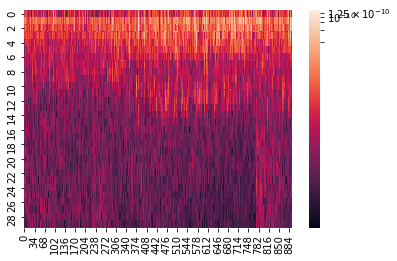

In [20]:
grafico_heatmap(mean_all_frec)

# A2

In [77]:
def ej2_frecuencias(electrode):
    
    np.array(0.0, )
    
    
    
    
    '''para un electrodo, cada epoch(todas sus muetras) calculamos welch, 
    es decir todas las frecuencias y sus potencias'''
    frecuencies = []
    for i in range (0,894):
        elec_x_frec = matrix_p01[i, electrode, :]
        f, Pxx = welch(elec_x_frec, float(Samples/0.8), nfft=2048)
        #f : ndarray
        #Array of sample frequencies.
        #Pxx : ndarray
        #Power spectral density or power spectrum of x.
        frecuencies.append(Pxx[0:2048])
    #print frecuencies
    frecuencies = np.array(frecuencies)#.T
    return frecuencies

In [81]:
frecs = []
for i in range(0,255):
    ej_2 = ej2_frecuencias(i)
    ej_2 = ej_2.T
    frec = ej_2.mean(1)
    frecs.append(frec)

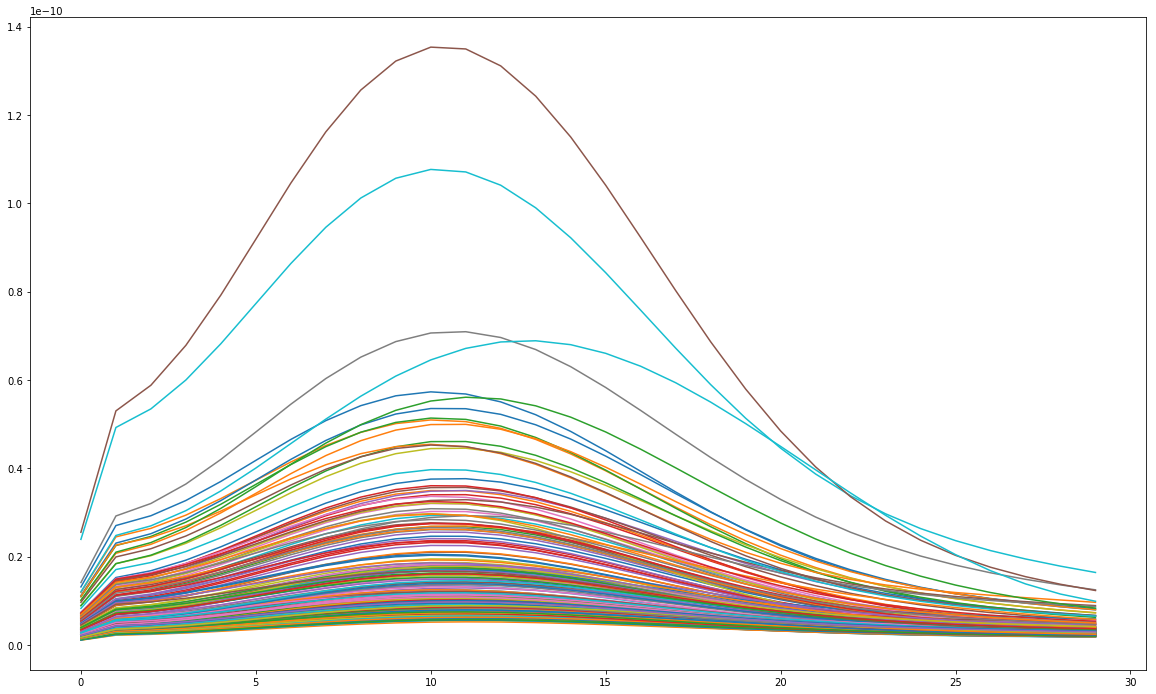

In [80]:
plt.figure(figsize=(20,12))
for i in range(0,255):
    plt.plot(range(0,cant_frec),frecs[i])

In [ ]:
def plot_ej2(electrodo_i_matrix, linestyle="-", linewidth=1):
    '''Esta funcion grafica el promedio entre epochs para cada muestra (1er muestra, primer medición 
    y %entre primeras epochs, la ultima muestra es la última medicion y % entre ultimas epochs )'''
    xs = electrodo_i_matrix.shape[1]
    plt.plot(range(0,xs), electrodo_i_matrix.mean(axis=0), linestyle=linestyle)

In [40]:
xs = electrodo_8_matrix.shape[1]
xs

201

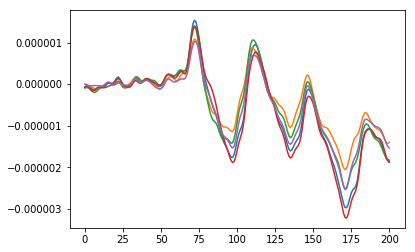

In [43]:
plot_ej2(electrodo_8_matrix)
plot_ej2(electrodo_80_matrix)
plot_ej2(electrodo_44_matrix)
plot_ej2(electrodo_185_matrix)
plot_ej2(electrodo_131_matrix)

In [60]:
# Bandas de frecuencia
DELTA = (0,4)
THETA = (4,8)
APLHA = (8,13)
BETA = (13,30)
GAMMA = (30,100)

(0, 4)

In [72]:
#
#ej_2 = epochs x las 30 primeras frecuencias 
# cada epoch representa: las frecuencias que tiene esa eposh
ej_2.shape

(30, 894)

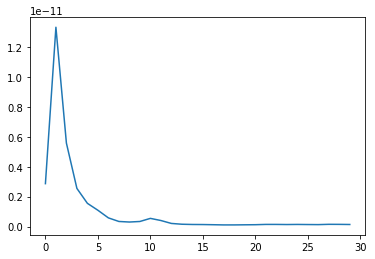

In [76]:
m = ej_2.mean(1)
plt.plot(range(0,len(m)),m)

In [ ]:
def nuevo_ej2